In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import obspy
import os
import re

In [2]:
sigloch_path = '/home/siglochnas1/shared/AmplitudeProjects/pdata_processed/psdata_events/'
event = '0731.2018.010.a'

In [36]:
sigloch_path + event + '/outfiles/ampinv.stf.xy'

'/home/siglochnas1/shared/AmplitudeProjects/pdata_processed/psdata_events/0731.2018.010.a/outfiles/ampinv.stf.xy'

In [18]:
times = []
amplitudes = []

file_path = sigloch_path + event + '/outfiles/ampinv.stf.xy'

with open(file_path, 'r') as file:
    content = file.read()
    content = content.split('\n')
    for c in content:
        if c not in ['<', '>', '']:
            split = c.split()
            times.append(float(split[0]))
            amplitudes.append(float(split[1]))

print(times)

[3.0, 3.02734375, 3.0546875, 3.08203125, 3.109375, 3.13671875, 3.1640625, 3.19140625, 3.21875, 3.24609375, 3.2734375, 3.30078125, 3.328125, 3.35546875, 3.3828125, 3.41015625, 3.4375, 3.46484375, 3.4921875, 3.51953125, 3.546875, 3.57421875, 3.6015625, 3.62890625, 3.65625, 3.68359375, 3.7109375, 3.73828125, 3.765625, 3.79296875, 3.8203125, 3.84765625, 3.875, 3.90234375, 3.9296875, 3.95703125, 3.984375, 4.01171875, 4.0390625, 4.06640625, 4.09375, 4.12109375, 4.1484375, 4.17578125, 4.203125, 4.23046875, 4.2578125, 4.28515625, 4.3125, 4.33984375, 4.3671875, 4.39453125, 4.421875, 4.44921875, 4.4765625, 4.50390625, 4.53125, 4.55859375, 4.5859375, 4.61328125, 4.640625, 4.66796875, 4.6953125, 4.72265625, 4.75, 4.77734375, 4.8046875, 4.83203125, 4.859375, 4.88671875, 4.9140625, 4.94140625, 4.96875, 4.99609375, 5.0234375, 5.05078125, 5.078125, 5.10546875, 5.1328125, 5.16015625, 5.1875, 5.21484375, 5.2421875, 5.26953125, 5.296875, 5.32421875, 5.3515625, 5.37890625, 5.40625, 5.43359375, 5.4609375, 

In [31]:
max(amplitudes)

17.8983479

In [33]:
amplitudes = np.array(amplitudes)

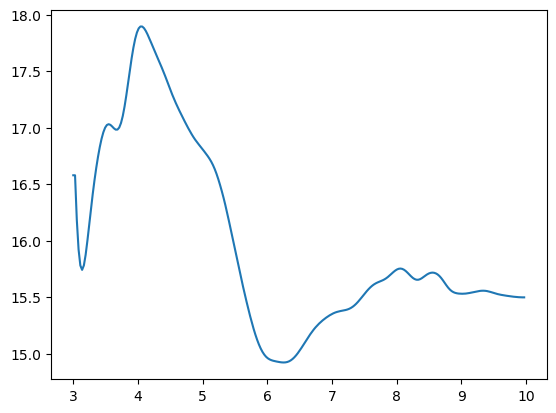

In [35]:
plt.plot(times, amplitudes)

In [29]:
st = obspy.read(sigloch_path + event + '/data/stf.01')

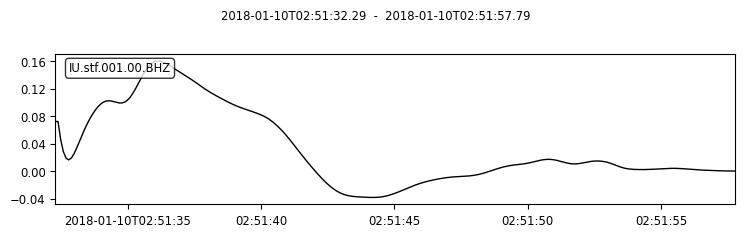

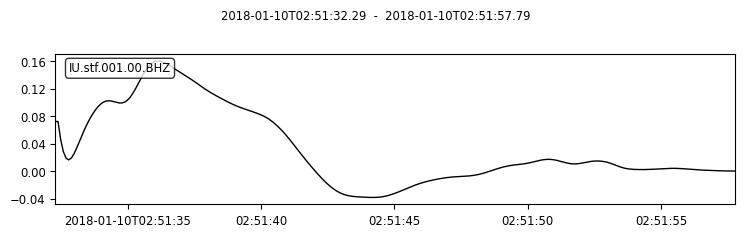

In [30]:
st.plot()

extract info on time date location etc

In [37]:
scardec = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec.csv')
isc = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/isc.csv')

In [70]:
isc

,isc_name,year,month,day,hour,minute,second,latitude,longitude,depth,isc_magnitude,isc_mag_type,isc_mag_unc
0,617094574,2020,1,2,11,25,5,-5.7593,125.0443,21.8833,5.39,mb,0.12
1,617118491,2020,1,3,15,28,52,11.7300,-86.2848,113.4677,5.23,mb,0.15
2,617125615,2020,1,6,10,32,19,17.7486,-66.8286,8.0798,5.95,mb,0.13
3,617125982,2020,1,7,8,24,25,17.8096,-66.7908,7.9220,6.27,mb,0.10
4,617152277,2020,1,9,8,38,8,62.2654,171.0078,8.9598,5.97,mb,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,621237324,2020,12,29,7,10,29,43.3575,-127.1509,16.8762,5.34,mb,0.14
152,621552095,2020,8,18,0,3,48,12.0113,124.1352,10.9602,6.38,mb,0.18
153,621560715,2020,12,6,16,47,42,-20.3399,-68.9816,104.0849,6.03,mb,0.11
154,624386170,2020,7,15,21,39,40,7.4026,-81.8805,9.9364,5.69,mb,0.15


In [39]:
scardec.columns

Index(['scardec_name', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'latitude', 'longitude', 'depth', 'scardec_magnitude',
       'scardec_mag_type', 'moment'],
      dtype='object')

In [136]:
sigloch_db = pd.DataFrame(columns = ['event_id', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'latitude', 'longitude', 'depth', 'sigloch_magnitude',
       'sigloch_mag_type', 'flinn_engdahl_region'])

In [137]:
l

['depth', 'set', 'to', '6.0', 'km']

In [138]:
sigloch_files = '/home/siglochnas1/shared/AmplitudeProjects/pdata_processed/psdata_events/'
for event in os.listdir(sigloch_files):
    if not event.startswith('0'):
        continue
    try:
        with open(sigloch_path + event + '/README') as f:
            lines = f.readlines()

            #lines = file.split('\n')
            event_id = event
            # print(event)
            # print(lines)
            for line_no, l in enumerate(lines):
                if line_no >10:
                    break
                l = l.split()
                for i, item in enumerate(l):
                    if item == 'Event:':
                        date = l[i+1]
                        time = l[i+2]
                    if item == 'Mag:':
                        mag = l[i+1]
                    if item == 'Type' or item == 'Mag_type:':
                        mag_type = l[i+1]
                    if item == 'Lon:':
                        lon = l[i+1]
                    if item == 'Lat:':
                        lat = l[i+1]
                    if item == 'Depth:':
                        depth = l[i+1]

            date_split = re.split('[-|/]', date)
            time_split = re.split(':', time)
            year = int(date_split[0])
            month = int(date_split[1])
            day = int(date_split[2])
            hour = int(time_split[0])
            minute = int(time_split[1])
            second = int(time_split[-1].split('.')[0])

            # print(date)
            # print(year)


            region = int(event.split('.')[0])

            df1 = pd.DataFrame([[event_id, year, month, day, hour, minute, second, lat, lon, depth, mag, mag_type, region]], columns = ['event_id', 'year', 'month', 'day', 'hour', 'minute', 'second', 'latitude', 'longitude', 'depth', 'sigloch_magnitude', 'sigloch_mag_type', 'flinn_engdahl_region'])

            sigloch_db = pd.concat([sigloch_db, df1], ignore_index=True)
    except FileNotFoundError:
        print(event)

0117.2017.175.a
0173.2017.304.a
0049.2017.265.a
0007.2017.130.a
0134.2017.224.a
0171.2017.168.a
0274.2017.225.a
0068.2017.254.a
0174.2017.289.a
0127.2017.105.a
0153.2017.131.b
0110.2017.156.a
0169.2017.227.a
0049.2017.088.a
0265.2017.340.a
0002.2017.061.a
0173.2017.197.a
0007.2017.128.b
0007.2017.128.c
0105.2017.337.a
0092.2017.034.a
0006.2017.117.a
0115.2017.199.a
0066.2017.287.a
0165.2017.238.a
0123.2017.278.a
0272.2017.304.a
0066.2017.253.a
0173.2017.281.a
0019.2017.121.b
0171.2017.003.a
0134.2017.261.a
0221.2017.333.a
0060.2017.259.a
0134.2017.113.a
0135.2017.118.b
0134.2017.193.a
0150.2017.126.a
0004.2017.198.a
0009.2017.221.a
0017.2017.148.a
0169.2017.324.a
0066.2017.262.a
0153.2017.247.a
0066.2017.266.a
0221.2017.211.a
0224.2018.024.a
0173.2017.345.a
0124.2017.134.a
0110.2017.108.a
0013.2017.243.a
0105.2017.031.a
0009.2017.144.a
0173.2017.117.a
0060.2017.287.a
0153.2017.190.a
0153.2017.258.a
0277.2017.263.a
0218.2017.356.a
0005.2017.086.a
0115.2017.333.a
0153.2017.130.a
0123.201

In [134]:
sigloch_db

,event_id,year,month,day,hour,minute,second,latitude,longitude,depth,sigloch_magnitude,sigloch_mag_type,flinn_engdahl_region
0,0082.2015.210.a,2015,7,29,0,10,24,8.2309,-77.3152,12.0,5.9,mww,82
1,0222.2007.013.b,2007,1,13,17,37,7,47.03,156.10,10.00,5.9,mww,222
2,0186.2011.254.a,2011,9,11,23,37,34,-18.188,167.734,29.0,5.8,mww,186
3,0181.2007.008.a,2007,1,8,20,52,20,-18.58,-177.85,406.80,6.3,mww,181
4,0221.2003.364.a,2003,12,30,9,50,44,47.05,154.19,33.00,5.9,mww,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,0124.2007.298.a,2007,10,25,8,35,17,-20.64,-68.46,101.70,5.7,mww,124
3674,0684.2009.337.a,2009,12,3,6,12,32,-56.476,-122.321,10.0,6.0,mwc,684
3675,0181.2004.322.a,2004,11,17,21,9,13,-20.07,-178.71,622.60,6.5,mwc,181
3676,0280.2007.182.a,2007,7,1,14,34,12,-5.93,130.56,134.60,5.9,mwc,280


In [135]:
sigloch_db.to_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/sigloch.csv', index=False)

In [122]:
event

'0161.2009.196.a'

In [123]:
l

['3']

In [121]:
lines

['Event: 2009/07/15 09:22:29.30 OFF W. COAST OF S. ISLAND, N.Z.\n',
 'Mag: 7.8 Type: XX Lat: -45.76 Lon: 166.56 Depth: 12.00\n',
 'Catalog: XXXX Contributor: XXXX Source: XXXX\n',
 '0161.2009.196.a\n',
 '\n',
 '\n',
 '44/62 smgrs accepted\n',
 '18/62 smgrs rejected\n',
 '4 groups\n',
 '\n',
 'Group   #_members     dt_group\n',
 '\n',
 '    1        12       1.88 s\n',
 '    2        22      -1.33 s\n',
 '    3         7       7.01 s\n',
 '    4         3       9.42 s\n',
 '\n',
 'quite great periode, but strong inset\n',
 'mostly Australia\n',
 '\n',
 '----------------------------------------------\n',
 '\n',
 'Preproc(40,70)\n',
 '\n',
 '39/47 smgrs accepted\n',
 '8/47 smgrs rejected\n',
 '5 groups\n',
 '\n',
 'Group   #_members     dt_group\n',
 '\n',
 '    1        14       3.19 s\n',
 '    2        10      11.03 s\n',
 '    3         7      -1.33 s\n',
 '    4         2       6.11 s\n',
 '    5         6       4.80 s\n',
 '\n',
 'nothern Australia, Indonesia\n',
 '\n',
 '----------